In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

%matplotlib inline



#ランダムシードの設定
import random
np.random.seed(2021)
random.seed(2021)

In [2]:
input = Path('input')
df = pd.read_csv(input / 'join_data.csv')
df.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,...,region_M,region_N,region_O,region_P,region_Q,region_R,region_S,region_T,unknown,music_nature_sum
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,...,0,0,0,0,0,0,0,0,0,2.994378
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,...,0,0,0,0,0,0,0,0,0,2.356047
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,...,0,0,0,0,0,0,0,0,0,2.412058
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,...,0,0,0,0,0,0,0,0,0,2.415582
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,...,0,0,0,0,0,0,0,0,1,3.066767


In [3]:
features = ['acousticness',
           'positiveness',
           'danceability',
           'loudness',
           'energy',
           'liveness',
           'speechiness',
           'instrumentalness',
           ]

In [4]:
factor_data = df[features]
factor_data.head()

,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
0,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884
1,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910
2,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470
3,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399
4,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030


In [5]:
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      8092 non-null   float64
 1   positiveness      8092 non-null   float64
 2   danceability      8092 non-null   float64
 3   loudness          8092 non-null   float64
 4   energy            8092 non-null   float64
 5   liveness          8092 non-null   float64
 6   speechiness       8092 non-null   float64
 7   instrumentalness  8092 non-null   float64
dtypes: float64(8)
memory usage: 505.9 KB


In [6]:
factor_data.describe()

,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
count,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000
mean,0.340836,0.465976,0.501746,-7.676095,0.606209,0.267455,0.200215,0.215282
std,0.238693,0.222505,0.159744,4.049943,0.200834,0.156312,0.084976,0.155266
min,0.000000,0.000000,0.000000,-37.820457,0.000000,0.000000,0.000000,0.000000
25%,0.147911,0.283000,0.391470,-9.769150,0.461977,0.168740,0.149491,0.143730
50%,0.249046,0.449623,0.508950,-7.145340,0.635327,0.219955,0.184987,0.172111
75%,0.508564,0.642245,0.616651,-4.906935,0.770725,0.321179,0.226771,0.205584
max,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:xlabel='acousticness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='positiveness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='danceability', ylabel='acousticness'>,
        <AxesSubplot:xlabel='loudness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='energy', ylabel='acousticness'>,
        <AxesSubplot:xlabel='liveness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='speechiness', ylabel='acousticness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='acousticness'>],
       [<AxesSubplot:xlabel='acousticness', ylabel='positiveness'>,
        <AxesSubplot:xlabel='positiveness', ylabel='positiveness'>,
        <AxesSubplot:xlabel='danceability', ylabel='positiveness'>,
        <AxesSubplot:xlabel='loudness', ylabel='positiveness'>,
        <AxesSubplot:xlabel='energy', ylabel='positiveness'>,
        <AxesSubplot:xlabel='liveness', ylabel='positiveness'>,
        <AxesSubplot:xlabel='speechiness', ylabel='positiveness'>,
     

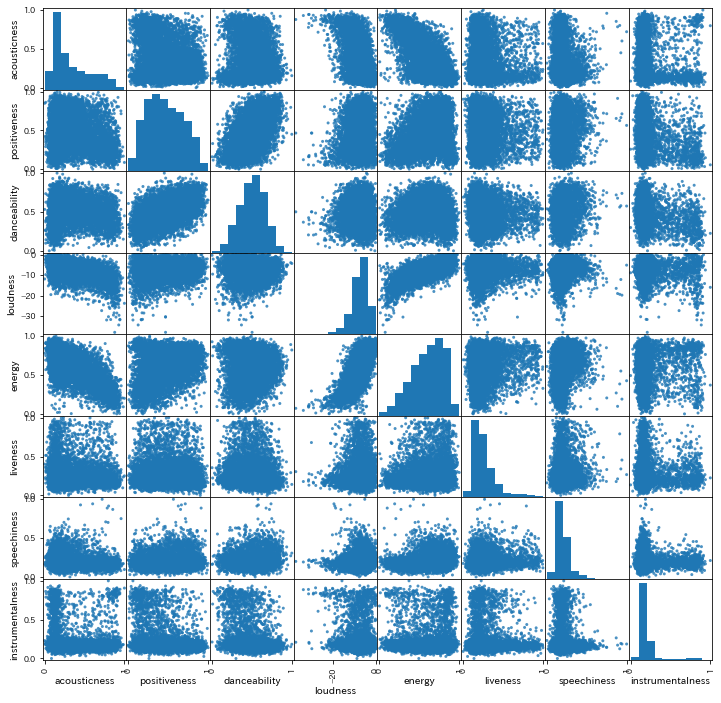

In [10]:
import japanize_matplotlib
from pandas import plotting

plotting.scatter_matrix(factor_data, figsize=(12, 12), alpha=0.8)

In [7]:
factor_data.isnull().sum()

acousticness        0
positiveness        0
danceability        0
loudness            0
energy              0
liveness            0
speechiness         0
instrumentalness    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(factor_data)

z = sc.transform(factor_data)

print(z)
print(z.shape)

[[-0.9553665  -1.38760331 -1.96517058 ...  0.61491787  2.23479722
   4.33865467]
 [-1.00345594 -0.53671031  0.32990994 ... -0.47064954 -0.45566487
  -0.58851913]
 [ 0.65185471 -0.9015451  -0.2761086  ... -0.32187197  1.98705141
  -0.31439455]
 ...
 [-0.52482814  1.62968881  1.17696168 ...  0.32497654 -0.89991392
  -0.51527933]
 [-0.56880842  1.1891606   0.49354322 ...  0.59633364 -0.40458945
  -0.33789836]
 [ 1.71062049 -0.81912956  0.05095038 ... -0.08323971 -0.73998822
  -0.3645549 ]]
(8092, 8)


In [9]:
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components=3

# 因子分析の実行
fa = FA(n_components, max_iter=5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)

[[-1.42050417  2.25922722 -0.02192507]
 [-1.26511316  0.28403797  0.25330683]
 [ 0.80845244  0.32608244 -0.24050241]
 ...
 [-0.43400104 -1.27842323  0.68553572]
 [-1.15433863 -0.62319026 -0.60607224]
 [ 1.16141601  0.13578357 -0.5669843 ]]
(8092, 3)


In [10]:
fa.components_.T

array([[ 0.71259787, -0.02428741,  0.01306111],
       [-0.3105177 , -0.71310554,  0.08275086],
       [-0.05083915, -0.75044575, -0.02696928],
       [-0.7097504 ,  0.00394164, -0.53776029],
       [-0.9857599 ,  0.0160969 ,  0.04646369],
       [-0.15698444,  0.06764846,  0.09013754],
       [-0.19386251, -0.09346651,  0.05886548],
       [-0.01220309,  0.34590558,  0.20979953]])

In [11]:
Factor_loading_matrix = fa.components_.T

# データフレームに変換
pd.DataFrame(Factor_loading_matrix, 
             columns=["第1因子", "第2因子", "第3因子"], 
             index=["アコースティック性","ポジティブ性","踊りやすさ","音量・音圧","エネルギー性","ライブ性","スピーチ性","インスト性"])

,第1因子,第2因子,第3因子
アコースティック性,0.712598,-0.024287,0.013061
ポジティブ性,-0.310518,-0.713106,0.082751
踊りやすさ,-0.050839,-0.750446,-0.026969
音量・音圧,-0.709750,0.003942,-0.537760
エネルギー性,-0.985760,0.016097,0.046464
ライブ性,-0.156984,0.067648,0.090138
スピーチ性,-0.193863,-0.093467,0.058865
インスト性,-0.012203,0.345906,0.209800


In [ ]:
'''
➀因子負荷量の絶対値の大きさ
➁因子負荷量のプラス・マイナス、にもとづいて因子の解釈を行う
'''

In [13]:
factor = pd.DataFrame(fitted,
                     columns=['factor_1','factor_2','factor_3'])
factor.head()

,factor_1,factor_2,factor_3
0,-1.420504,2.259227,-0.021925
1,-1.265113,0.284038,0.253307
2,0.808452,0.326082,-0.240502
3,-1.235781,1.103026,0.207864
4,-0.324308,-1.586230,-0.732366


In [14]:
print(factor.shape)

(8092, 3)


In [20]:
factor.to_csv(input / 'factor_data.csv',index=False)

,nature_factor


,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
0,-0.955367,-1.387603,-1.965171,1.430045,1.432662,0.614918,2.234797,4.338655
1,-1.003456,-0.536710,0.329910,0.525867,1.335512,-0.470650,-0.455665,-0.588519
2,0.651855,-0.901545,-0.276109,-0.390048,-0.827977,-0.321872,1.987051,-0.314395
3,-0.733915,-0.990798,-0.908808,0.638890,1.307106,0.701010,0.311420,-0.256881
4,-0.628947,1.400512,2.058003,0.924070,0.218805,-0.627839,0.262121,0.069233
